<a href="https://colab.research.google.com/github/anas1IA/Windows_attack10/blob/main/test/attack_windows_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Train_Test_Windows_10 (1).csv")

In [4]:
df.head()

,Processor_DPC_Rate,Processor_pct_ Idle_Time,Processor_pct_ C3_Time,Processor_pct_ Interrupt_Time,Processor_pct_ C2_Time,Processor_pct_ User_Time,Processor_pct_ C1_Time,Processor_pct_ Processor_Time,Processor_C1_ransitions_sec,Processor_pct_ DPC_Time,...,LogicalDisk(_Total) Avg Disk Write Queue Length,LogicalDisk(_Total) Avg Disk Queue Length,LogicalDisk(_Total) pct_ Disk Read Time,LogicalDisk(_Total) Disk Write Bytes sec,LogicalDisk(_Total) Disk Transfers sec,LogicalDisk(_Total) Avg Disk Bytes Transfer,LogicalDisk(_Total) pct_ Disk Write Time,LogicalDisk(_Total) Avg Disk sec Transfer,label,type
0,0,49.07244938,0,0.779671928,0,21.830814,49.07244938,45.5788994,405.2109934,0.155934386,...,0.035543669,0.035727836,0.006138575,980725.4671,61.12065428,16125.91191,1.184788963,0.000584015,1,dos
1,17,0,0,1.170522789,0,38.15904291,0,100,0,2.41908043,...,0.071868506,0.113428645,1.38968492,695437.4911,56.84042385,17923.5993,2.403132421,0.001995776,1,dos
2,11,0,0,0.546510062,0,65.1127703,0,100,0,0.312291464,...,0.010271601,0.023255341,0.432790999,691341.4197,9.388015072,86462.6383,0.342387367,0.002475624,1,dos
3,0,0,0,0.78081667,0,68.94611198,0,100,0,1.015061671,...,0.062088903,0.070302274,0.273779061,1039903.208,81.89439351,13206.97436,2.069629418,0.000858868,1,dos
4,0,0,0,0.468739969,0,66.0142123,0,100,0,0.156246656,...,0.100304043,0.123923448,0.787313151,2498188.869,190.1717481,15214.36803,3.34346845,0.000651557,1,dos


In [21]:
data_wcorr = df.apply(pd.to_numeric, errors='coerce').drop(columns=["label", "type"])

In [48]:
data_wcorr.isnull().sum()

Processor_DPC_Rate                              0
Processor_pct_ Idle_Time                        0
Processor_pct_ C3_Time                          0
Processor_pct_ Interrupt_Time                   0
Processor_pct_ C2_Time                          0
                                               ..
LogicalDisk(_Total) Disk Write Bytes sec        0
LogicalDisk(_Total) Disk Transfers sec          0
LogicalDisk(_Total) Avg  Disk Bytes Transfer    0
LogicalDisk(_Total) pct_ Disk Write Time        0
LogicalDisk(_Total) Avg  Disk sec Transfer      0
Length: 124, dtype: int64

In [47]:
data_wcorr = data_wcorr.fillna(data_wcorr.mean())

In [45]:
data_wcorr["Processor_pct_ C3_Time"].unique()

array([ 0., nan])

In [22]:
data_wcorr.describe()

,Processor_DPC_Rate,Processor_pct_ Idle_Time,Processor_pct_ C3_Time,Processor_pct_ Interrupt_Time,Processor_pct_ C2_Time,Processor_pct_ User_Time,Processor_pct_ C1_Time,Processor_pct_ Processor_Time,Processor_C1_ransitions_sec,Processor_pct_ DPC_Time,...,LogicalDisk(_Total) pct_ Disk Time,LogicalDisk(_Total) Avg Disk Bytes Read,LogicalDisk(_Total) Avg Disk Write Queue Length,LogicalDisk(_Total) Avg Disk Queue Length,LogicalDisk(_Total) pct_ Disk Read Time,LogicalDisk(_Total) Disk Write Bytes sec,LogicalDisk(_Total) Disk Transfers sec,LogicalDisk(_Total) Avg Disk Bytes Transfer,LogicalDisk(_Total) pct_ Disk Write Time,LogicalDisk(_Total) Avg Disk sec Transfer
count,21104.000000,21099.000000,21099.0,21099.000000,21099.0,21099.000000,21099.000000,21099.000000,21099.000000,21099.000000,...,21099.000000,21099.000000,21099.000000,21099.000000,21099.000000,2.109900e+04,21099.000000,21099.000000,21099.000000,21099.000000
mean,5.248531,68.870041,0.0,0.227967,0.0,18.682632,68.870041,28.484150,517.026824,0.581405,...,7.051582,16474.428851,0.030354,0.139302,4.479611,1.298456e+06,198.873004,27293.311474,2.571971,0.000737
std,16.786584,20.213621,0.0,0.426777,0.0,14.084287,20.213621,20.143289,797.833705,1.258714,...,21.897567,25983.123882,0.131383,0.413089,15.194485,3.630272e+06,626.568144,56630.403049,12.978546,0.001142
min,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,0.000000,60.518870,0.0,0.000000,0.0,7.421688,60.518870,12.959987,151.927954,0.000000,...,0.016051,0.000000,0.000388,0.000479,0.000000,1.175759e+04,0.899961,11548.135265,0.013031,0.000304
50%,0.000000,72.015475,0.0,0.078130,0.0,15.390610,72.015475,25.625522,289.758592,0.078165,...,0.064079,9467.597052,0.001201,0.001885,0.002469,3.937941e+04,3.700081,16384.000000,0.041095,0.000437
75%,2.000000,84.496245,0.0,0.312469,0.0,25.430423,84.496245,36.243182,416.295866,0.625980,...,0.326625,25600.000000,0.005424,0.008964,0.064500,2.406529e+05,20.108406,24576.000000,0.188960,0.000702
max,195.000000,99.638956,0.0,10.641964,0.0,91.566420,99.638956,100.000000,10318.521390,21.953888,...,313.419250,944383.062300,1.836753,4.236590,294.529448,6.393745e+07,5968.067353,977715.200000,183.675284,0.045244


In [49]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j])> threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)

    for i in range(len(dataset.columns)):
      colname = dataset.columns[i]
      if len(dataset[colname].unique()) == 1:
        col_corr.add(colname)
    return list(col_corr)

In [50]:
col_to_remove = correlation(data_wcorr, 0.7)

In [51]:
len(col_to_remove)

78

In [52]:
data = data_wcorr.drop(columns=col_to_remove)

In [55]:
data

,Processor_DPC_Rate,Processor_pct_ Idle_Time,Processor_pct_ Interrupt_Time,Processor_C1_ransitions_sec,Processor_pct_ DPC_Time,Process_Pool_Paged Bytes,Process_IO Read_Operations_sec,Process_Working_Set_ Private,Process_IO_Write Operations_sec,Process_Page_File Bytes Peak,...,Memory Write Copies sec,LogicalDisk(_Total) Avg Disk Bytes Write,LogicalDisk(_Total) pct_ Idle Time,LogicalDisk(_Total) Avg Disk sec Read,LogicalDisk(_Total) Disk Writes sec,LogicalDisk(_Total) Current Disk Queue Length,LogicalDisk(_Total) Split IO Sec,LogicalDisk(_Total) Avg Disk sec Write,LogicalDisk(_Total) Avg Disk Bytes Read,LogicalDisk(_Total) Avg Disk sec Transfer
0,0,49.072449,0.779672,405.210993,0.155934,27042896,130.417318,880357376,746.609232,2194259968,...,49.056055,16124.642620,98.911296,0.000615,60.821532,0,1.595319,0.000584,16384.00000,0.000584
1,17,0.000000,1.170523,0.000000,2.419080,29781168,64.132781,1026715648,303.382016,2353979392,...,57.439796,16380.385880,97.193106,0.002889,42.455501,2,2.097801,0.001693,22478.22222,0.001996
2,11,0.000000,0.546510,0.000000,0.312291,32343712,102.469186,1056952320,35.854228,2520064000,...,64.417763,157323.636400,99.698802,0.002598,4.394390,0,1.298343,0.002336,24104.96000,0.002476
3,0,0.000000,0.780817,0.000000,1.015062,31974392,101.293065,1049182208,31.497844,2513719296,...,1.099925,13315.933420,98.202580,0.002163,78.094654,0,1.799877,0.000795,10967.57895,0.000859
4,0,0.000000,0.468740,0.000000,0.156247,31501864,56.291637,1071140864,7.398901,2535165952,...,29.695588,15078.817140,96.133427,0.000964,165.675387,0,7.498886,0.000605,16131.13469,0.000652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21099,0,48.025911,0.234004,147.567189,0.156003,32288520,2.396220,1063337984,1.697322,2959708160,...,12.879680,11878.400000,99.962004,0.000450,0.998425,0,0.199685,0.001010,23210.66667,0.000881
21100,0,63.662718,0.078246,165.855559,0.000000,32285608,0.000000,1065009152,3.705710,2959708160,...,3.004630,7119.238095,99.951980,0.000490,4.206482,0,0.100154,0.000353,65536.00000,0.000356
21101,1,82.341507,0.000000,189.607120,0.000000,32232232,0.000000,1065484288,0.299537,2960605184,...,1.597532,10137.600000,99.984523,0.000000,1.497687,0,0.000000,0.000299,0.00000,0.000299
21102,0,38.792680,0.156246,172.995329,0.156246,32305240,0.000000,1067827200,1.299965,2963939328,...,2.999919,15872.000000,99.976591,0.000727,0.799978,0,0.099997,0.000772,32768.00000,0.000767


In [56]:
data.describe()

,Processor_DPC_Rate,Processor_pct_ Idle_Time,Processor_pct_ Interrupt_Time,Processor_C1_ransitions_sec,Processor_pct_ DPC_Time,Process_Pool_Paged Bytes,Process_IO Read_Operations_sec,Process_Working_Set_ Private,Process_IO_Write Operations_sec,Process_Page_File Bytes Peak,...,Memory Write Copies sec,LogicalDisk(_Total) Avg Disk Bytes Write,LogicalDisk(_Total) pct_ Idle Time,LogicalDisk(_Total) Avg Disk sec Read,LogicalDisk(_Total) Disk Writes sec,LogicalDisk(_Total) Current Disk Queue Length,LogicalDisk(_Total) Split IO Sec,LogicalDisk(_Total) Avg Disk sec Write,LogicalDisk(_Total) Avg Disk Bytes Read,LogicalDisk(_Total) Avg Disk sec Transfer
count,21104.000000,21104.000000,21104.000000,21104.000000,21104.000000,2.110400e+04,21104.000000,2.110400e+04,21104.000000,2.110400e+04,...,21104.000000,21104.000000,21104.000000,21104.000000,21104.000000,21104.000000,21104.000000,21104.000000,21104.000000,21104.000000
mean,5.248531,68.870041,0.227967,517.026824,0.581405,2.644860e+07,164.045120,1.336076e+09,28.925773,3.971298e+09,...,5.533920,31899.867364,95.178041,0.000524,30.903530,0.119409,3.485444,0.000777,16474.428851,0.000737
std,16.786584,20.211226,0.426727,797.739183,1.258565,5.413629e+06,4022.045939,5.056969e+08,102.761038,1.386291e+09,...,21.662986,68060.188450,14.509481,0.001162,96.445832,0.483882,49.331833,0.002121,25980.045568,0.001142
min,0.000000,0.000000,0.000000,0.000000,0.000000,7.733328e+06,0.000000,2.281431e+08,0.000000,1.577538e+09,...,0.000000,0.000000,0.122548,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,60.521905,0.000000,151.930550,0.000000,2.232929e+07,2.200055,9.345106e+08,1.299960,2.962182e+09,...,0.000000,10731.918962,99.703534,0.000000,0.701093,0.000000,0.000000,0.000271,0.000000,0.000304
50%,0.000000,72.013685,0.078130,289.850030,0.078167,2.779906e+07,8.187284,1.357462e+09,8.099808,3.636130e+09,...,0.000000,15360.000000,99.936310,0.000340,2.603947,0.000000,0.099996,0.000390,9475.855422,0.000437
75%,2.000000,84.495764,0.312467,416.393143,0.625980,3.068336e+07,41.099413,1.701403e+09,25.486105,4.476684e+09,...,2.399957,27184.788605,99.983876,0.000632,15.700374,0.000000,0.300000,0.000642,25600.000000,0.000703
max,195.000000,99.638956,10.641964,10318.521390,21.953888,3.806623e+07,386896.672600,2.849071e+09,3009.198663,1.320974e+10,...,1426.051475,977715.200000,100.355056,0.037600,3025.274082,8.000000,2352.741707,0.189966,944383.062300,0.045244


<Axes: >

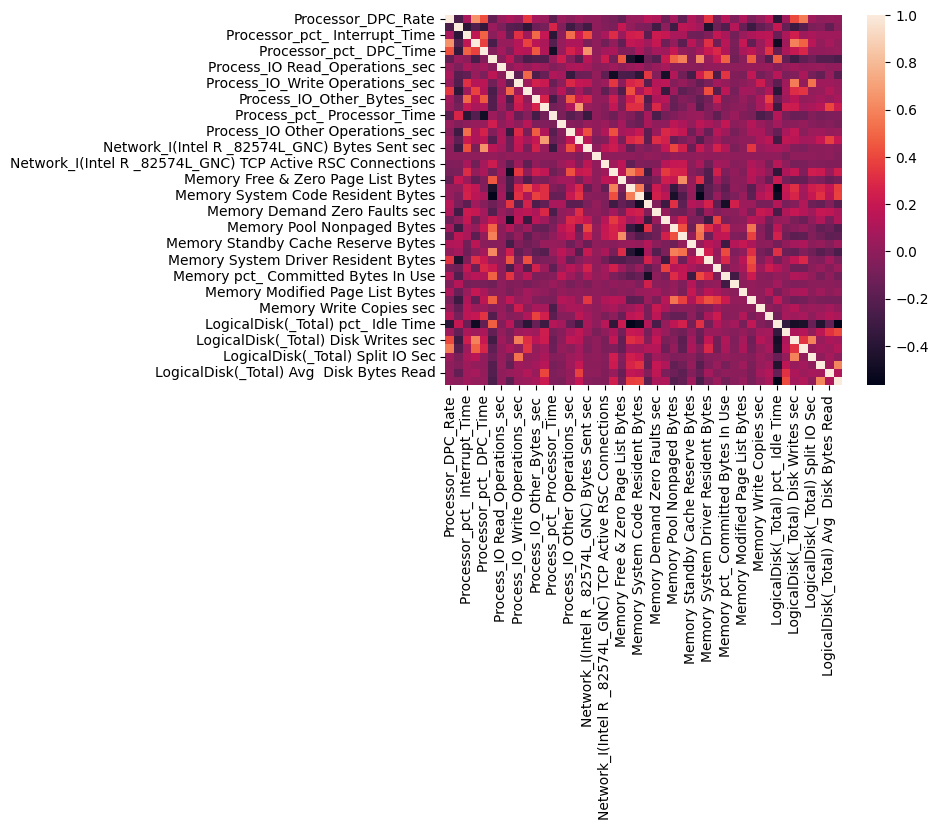

In [53]:
sns.heatmap(data.corr())

<Axes: >

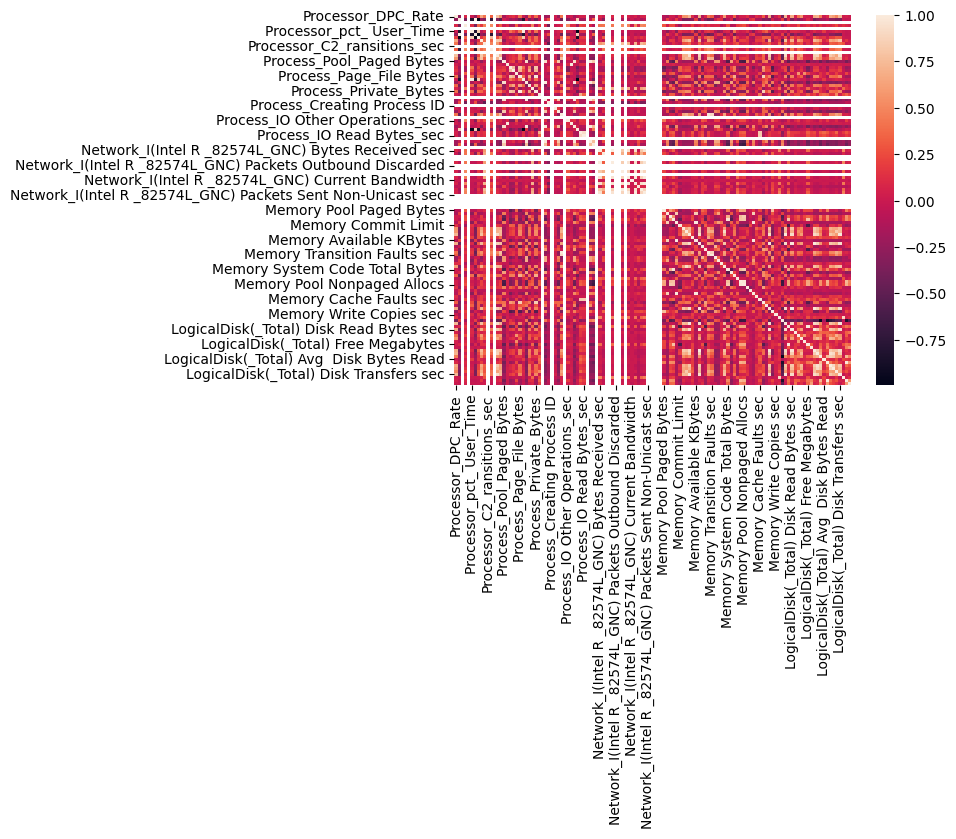

In [57]:
sns.heatmap(data_wcorr.corr())